<a href="https://colab.research.google.com/github/niyati10000/Image-Processing-Portfolio/blob/main/2_Enhancement_Filtering/Module_2_Enhancement_Filtering_Enhancement_Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

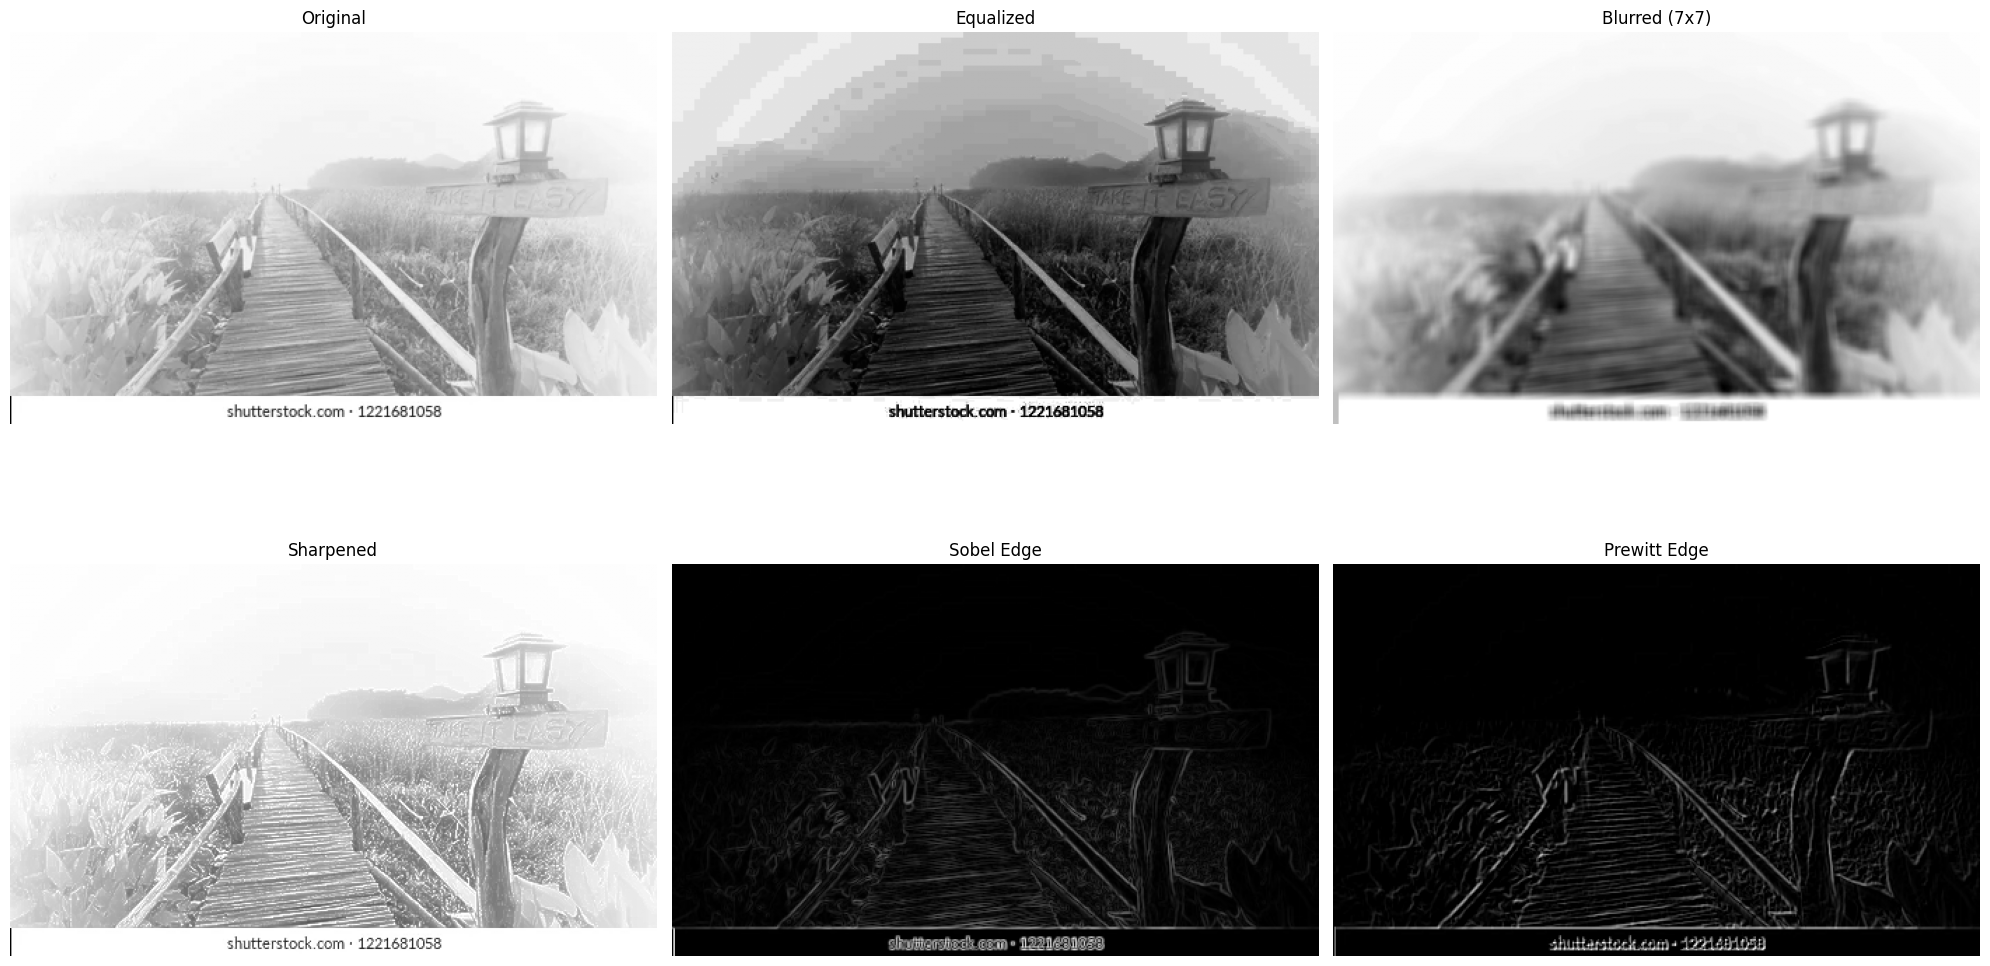

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('img1.webp', 0)

equ = cv2.equalizeHist(img)

kernel_3x3 = np.ones((3,3), np.float32)/9
kernel_7x7 = np.ones((7,7), np.float32)/49

blur_3x3 = cv2.filter2D(img, -1, kernel_3x3)
blur_7x7 = cv2.filter2D(img, -1, kernel_7x7)

lap_kernel = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
lap_img = cv2.filter2D(img, -1, lap_kernel)
sharpened = cv2.add(img, lap_img)

sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = np.sqrt(sobel_x**2 + sobel_y**2)

prewitt_kernel_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
prewitt_kernel_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
pre_x = cv2.filter2D(img, -1, prewitt_kernel_x)
pre_y = cv2.filter2D(img, -1, prewitt_kernel_y)
prewitt_combined = cv2.addWeighted(pre_x, 0.5, pre_y, 0.5, 0)

plt.figure(figsize=(20, 12))
images = [img, equ, blur_7x7, sharpened, sobel_combined, prewitt_combined]
titles = ['Original', 'Equalized', 'Blurred (7x7)', 'Sharpened', 'Sobel Edge', 'Prewitt Edge']

for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()